In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy import stats  # For mode calculation

In [2]:
df = pd.read_csv(r"C:\Users\raulo\Desktop\ze_vids\tracks_and_labels\Top+Front\Joinned\all_top+front_imputed.csv")
df_frame = pd.read_csv(r"C:\Users\raulo\Desktop\ze_vids\tracks_and_labels\Top+Front\Joinned\joinned_label+track_top+front.csv")

In [3]:
df["Behavior"].value_counts()

Background     419838
interaction     73498
posing            949
jolts             153
TS                 16
Name: Behavior, dtype: int64

In [5]:
df.columns

Index(['Behavior', 'Client_Mouth', 'Client_Mouth.1', 'Client_Mouth.2',
       'Client_Eye_L', 'Client_Eye_L.1', 'Client_Eye_L.2', 'Client_Eye_R',
       'Client_Eye_R.1', 'Client_Eye_R.2', 'Client_FinBase_L',
       'Client_FinBase_L.1', 'Client_FinBase_L.2', 'Client_FinTip_L',
       'Client_FinTip_L.1', 'Client_FinTip_L.2', 'Client_FinBase_R',
       'Client_FinBase_R.1', 'Client_FinBase_R.2', 'Client_FinTip_R',
       'Client_FinTip_R.1', 'Client_FinTip_R.2', 'Client_Spine_1',
       'Client_Spine_1.1', 'Client_Spine_1.2', 'Client_Spine_2',
       'Client_Spine_2.1', 'Client_Spine_2.2', 'Client_Tail', 'Client_Tail.1',
       'Client_Tail.2', 'Client_TailTip', 'Client_TailTip.1',
       'Client_TailTip.2', 'Cleaner_Mouth', 'Cleaner_Mouth.1',
       'Cleaner_Mouth.2', 'Cleaner_Spine1', 'Cleaner_Spine1.1',
       'Cleaner_Spine1.2', 'Cleaner_Spine2', 'Cleaner_Spine2.1',
       'Cleaner_Spine2.2', 'Cleaner_Tail', 'Cleaner_Tail.1', 'Cleaner_Tail.2',
       'Client_Mouth_Front', 'Client_M

In [7]:
# Create a new DataFrame to store the results
new_df = pd.DataFrame()

# Add relevant data to the new DataFrame
new_df["Behavior"] = df['Behavior']

new_df['Client_Mouth_X_Front'] = df['Client_Mouth_Front']
new_df['Client_Mouth_Y_Front'] = df['Client_Mouth_Front.1']

new_df['Client_S1_X_Front'] = df['Client_Spine_head_Front']
new_df['Client_S1_Y_Front'] = df['Client_Spine_head_Front.1']

new_df['Client_S2_X_Front'] = df['Client_Spine_mid_Front']
new_df['Client_S2_Y_Front'] = df['Client_Spine_mid_Front.1']

new_df['Client_Tail_X_Front'] = df['Client_Tail_Front']
new_df['Client_Tail_Y_Front'] = df['Client_Tail_Front.1']

new_df['Cleaner_Mouth_X_Front'] = df['Cleaner_Mouth_Front']
new_df['Cleaner_Mouth_Y_Front'] = df['Cleaner_Mouth_Front.1']

new_df['Cleaner_Spine1_X_Front'] = df['Cleaner_Spine1_Front']
new_df['Cleaner_Spine1_Y_Front'] = df['Cleaner_Spine1_Front.1']

new_df['Cleaner_Spine2_X_Front'] = df['Cleaner_Spine2_Front']
new_df['Cleaner_Spine2_Y_Front'] = df['Cleaner_Spine2_Front.1']

new_df['Cleaner_Tail_X_Front'] = df['Cleaner_Tail_Front']
new_df['Cleaner_Tail_Y_Front'] = df['Cleaner_Tail_Front.1']

new_df["Frame"] = df_frame['Frame'] #add column with frames

In [8]:
# Create a new column in new_df to store the centroid for each row
new_df['Client_Centroid_X'] = new_df[['Client_Mouth_X_Front', 'Client_S1_X_Front', 'Client_S2_X_Front', 'Client_Tail_X_Front']].mean(axis=1)
new_df['Client_Centroid_Y'] = new_df[['Client_Mouth_Y_Front', 'Client_S1_Y_Front', 'Client_S2_Y_Front', 'Client_Tail_Y_Front']].mean(axis=1)

In [9]:
# Create a new column in new_df to store the centroid for each row
new_df['Cleaner_Centroid_X'] = new_df[['Cleaner_Mouth_X_Front', 'Cleaner_Spine1_X_Front', 'Cleaner_Spine2_X_Front', 'Cleaner_Tail_X_Front']].mean(axis=1)
new_df['Cleaner_Centroid_Y'] = new_df[['Cleaner_Mouth_Y_Front', 'Cleaner_Spine1_Y_Front', 'Cleaner_Spine2_Y_Front', 'Cleaner_Tail_Y_Front']].mean(axis=1)

In [10]:
# Calculate the Euclidean distance between the two centroids for each row
new_df['Distance'] = np.sqrt(
    (new_df['Client_Centroid_X'] - new_df['Cleaner_Centroid_X'])**2 +
    (new_df['Client_Centroid_Y'] - new_df['Cleaner_Centroid_Y'])**2
)

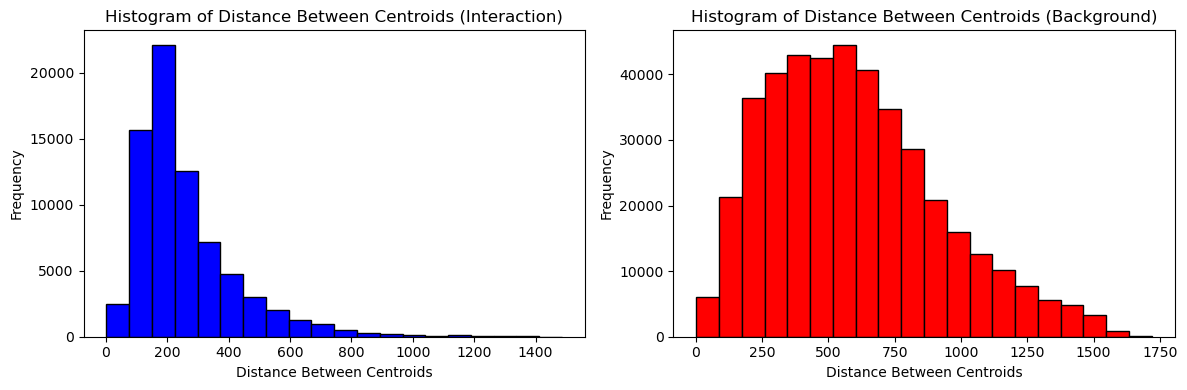

In [11]:
# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot the first histogram (interaction)
ax1.hist(new_df[new_df['Behavior'] == 'interaction']['Distance'], bins=20, edgecolor='black', color='blue')
ax1.set_xlabel('Distance Between Centroids')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of Distance Between Centroids (Interaction)')

# Plot the second histogram (non-interaction)
ax2.hist(new_df[new_df['Behavior'] == 'Background']['Distance'], bins=20, edgecolor='black', color='red')
ax2.set_xlabel('Distance Between Centroids')
ax2.set_ylabel('Frequency')
ax2.set_title('Histogram of Distance Between Centroids (Background)')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
plt.show()

In [12]:
new_df

,Behavior,Client_Mouth_X_Front,Client_Mouth_Y_Front,Client_S1_X_Front,Client_S1_Y_Front,Client_S2_X_Front,Client_S2_Y_Front,Client_Tail_X_Front,Client_Tail_Y_Front,Cleaner_Mouth_X_Front,...,Cleaner_Spine2_X_Front,Cleaner_Spine2_Y_Front,Cleaner_Tail_X_Front,Cleaner_Tail_Y_Front,Frame,Client_Centroid_X,Client_Centroid_Y,Cleaner_Centroid_X,Cleaner_Centroid_Y,Distance
0,Background,1211.211,892.211,1172.703,886.200,1155.988,916.081,1139.793,939.125,1540.458,...,1427.885,770.814,1372.046,764.164,25251.0,1169.92375,908.40425,1457.89100,774.03575,317.773553
1,Background,1211.291,892.209,1172.703,874.595,1156.516,867.733,1140.166,939.125,1540.458,...,1436.715,772.100,1380.475,764.213,25252.0,1170.16900,893.41550,1462.21725,774.32400,315.396521
2,Background,1223.261,893.869,1180.028,875.479,1163.916,859.737,1147.286,939.125,1539.523,...,1444.755,780.220,1394.224,770.402,25255.0,1178.62275,892.05250,1469.50775,777.93775,312.468013
3,Background,1234.698,898.790,1180.402,875.766,1163.916,868.607,1147.982,939.222,1531.682,...,1452.101,780.463,1402.352,771.239,25256.0,1181.74950,895.59625,1471.58325,779.56200,312.197934
4,Background,1239.270,898.790,1180.470,875.766,1163.916,868.607,1156.621,939.222,1531.352,...,1457.998,781.219,1404.103,773.472,25257.0,1185.06925,895.59625,1473.41275,780.31950,310.532934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494449,Background,1301.875,812.957,1328.957,796.664,1357.539,788.465,1371.901,788.185,907.989,...,716.660,252.232,642.563,236.557,168761.0,1340.06800,796.56775,769.54600,266.78150,778.568445
494450,Background,1301.875,813.515,1328.957,800.570,1357.313,788.513,1371.770,788.255,919.056,...,723.420,259.884,646.017,251.281,168762.0,1339.97875,797.71325,774.86900,272.80350,771.284173
494451,Background,1306.700,818.079,1332.347,802.501,1356.941,789.440,1371.901,794.863,956.078,...,755.400,276.540,673.162,268.449,168765.0,1341.97225,801.22075,812.80525,276.40400,745.285405
494452,Background,1306.700,816.668,1332.347,802.372,1356.771,787.931,1371.770,794.863,956.078,...,755.400,276.540,673.162,268.449,168766.0,1341.89700,800.45850,812.80525,273.84250,746.500162


In [19]:
def detect_interactions(distances, min_consecutive=60, threshold=250):
    """
    Detect interactions in a sequence of distances.

    Parameters:
        distances (list or numpy array): A sequence of distances.
        min_consecutive (int): Minimum consecutive frames required for an interaction.
        threshold (float): Threshold value to determine an interaction.

    Returns:
        List of tuples where each tuple represents an interaction (start_frame, end_frame).
    """
    interactions = []
    current_start = None

    for i, distance in enumerate(distances):
        if distance < threshold:
            if current_start is None:
                current_start = i
        else:
            if current_start is not None:
                if i - current_start >= min_consecutive:
                    interactions.append((current_start, i - 1))
                current_start = None

    # Check if an interaction is ongoing at the end of the sequence
    if current_start is not None and len(distances) - current_start >= min_consecutive:
        interactions.append((current_start, len(distances) - 1))

    return interactions

In [20]:
total_frames = 0
correctly_detected_event = 0
total = 0
correctly_frame_count = 0

# Initialize the "Interaction_Predictions" column with a default value
new_df["Interaction_Predictions"] = "background"

interactions = detect_interactions(new_df["Distance"])

for interaction in interactions:
    
    start_frame, end_frame = interaction
    
    if end_frame - start_frame + 1 >= 15:
        total += 1  # Increment the total count for eligible interactions
        total_frames += end_frame - start_frame + 1
        selected_data = new_df.loc[start_frame:end_frame, "Behavior"]
        mode_value = stats.mode(selected_data).mode[0]
        
        if mode_value == "interaction":
            correctly_detected_event +=1
            correctly_frame_count += end_frame - start_frame + 1
            
            
        # Store the prediction in the new column
        new_df.loc[start_frame:end_frame, "Interaction_Predictions"] = mode_value

        print(f"Interaction detected from frame {start_frame} to {end_frame} (Duration: {end_frame - start_frame + 1} frames) with a true Behavior of {mode_value}")

Interaction detected from frame 1565 to 1774 (Duration: 210 frames) with a true Behavior of interaction
Interaction detected from frame 1975 to 2110 (Duration: 136 frames) with a true Behavior of interaction
Interaction detected from frame 2464 to 2665 (Duration: 202 frames) with a true Behavior of interaction
Interaction detected from frame 2812 to 2965 (Duration: 154 frames) with a true Behavior of interaction
Interaction detected from frame 4250 to 4317 (Duration: 68 frames) with a true Behavior of interaction
Interaction detected from frame 5155 to 5223 (Duration: 69 frames) with a true Behavior of interaction
Interaction detected from frame 6782 to 6889 (Duration: 108 frames) with a true Behavior of interaction
Interaction detected from frame 6962 to 7093 (Duration: 132 frames) with a true Behavior of interaction
Interaction detected from frame 8670 to 8776 (Duration: 107 frames) with a true Behavior of interaction
Interaction detected from frame 9794 to 9864 (Duration: 71 frames)

C:\Users\raulo\AppData\Local\Temp\ipykernel_9976\3749368743.py:19: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_value = stats.mode(selected_data).mode[0]
C:\Users\raulo\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "
C:\Users\raulo\AppData\Local\Temp\ipykernel_9976\3749368743.py:19: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see 

In [21]:
print(f"There was {correctly_frame_count} frames correclty classified, and a total of {total_frames} frames classified as interaction.")
print(f"Making this a {correctly_frame_count/total_frames *100} % accuracy.")
print(f"There was a total of {correctly_detected_event} events detected correctly. With a total of {total} events detected.")

There was 36411 frames correclty classified, and a total of 61510 frames classified as interaction.
Making this a 59.19525280442205 % accuracy.
There was a total of 286 events detected correctly. With a total of 493 events detected.


In [22]:
df["Behavior"].value_counts()

Background     419838
interaction     73498
posing            949
jolts             153
TS                 16
Name: Behavior, dtype: int64